In [33]:
!pip install matplotlib
!pip install scipy
!pip install numpy

!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Chenz\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Chenz\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Chenz\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Chenz\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import chi2_contingency
titanic = pd.read_csv('titanic_train.csv')

#standard importing and such

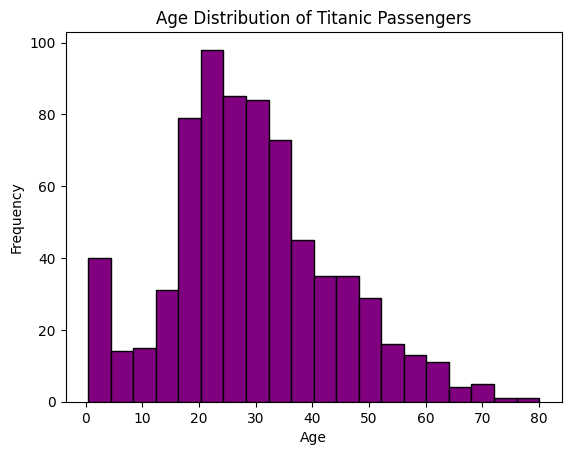

In [37]:
plt.hist(titanic['Age'].dropna(), bins=20, color='purple', edgecolor='black')
plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig(r"C:\Users\Chenz\Desktop\data science\AgeHist.png") 
plt.show()
#Age distribution histogram- pretty standard

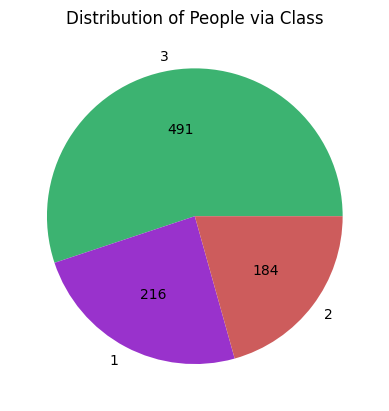

In [38]:
classes_pie = titanic["Pclass"].value_counts()
pie_colors = ["mediumseagreen", "darkorchid", "indianred"]
plt.pie(classes_pie, labels=classes_pie.index, colors=pie_colors, 
       autopct=lambda p: f'{int(p * sum(classes_pie) / 100)}')
plt.title("Distribution of People via Class")
plt.savefig(r"C:\Users\Chenz\Desktop\data science\ClassPie.png") 
plt.show() 
#This is categorical data as although it is not directly put in as "X class", they are
#Representative of three categories (classes) of people and not actual numbers

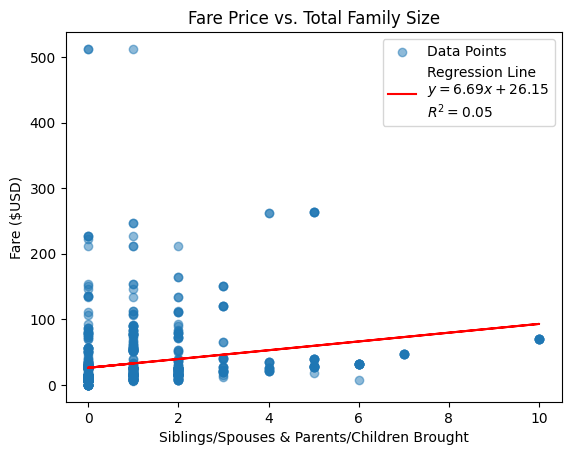

In [40]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']
Lindata = titanic[['FamilySize', 'Fare']].dropna()
#linear regression
slope, intercept, r_value, _, _ = linregress(Lindata['FamilySize'], Lindata['Fare'])

# scatter plot
plt.scatter(Lindata['FamilySize'], Lindata['Fare'], alpha=0.5, label='Data Points')

# plot reg
plt.plot(Lindata['FamilySize'], slope * Lindata['FamilySize'] + intercept, color='red', 
         label=f'Regression Line\n$y = {slope:.2f}x + {intercept:.2f}$\n$R^2 = {r_value**2:.2f}$')
## The regression code I found online, and it worked, so I hope it's right

plt.title("Fare Price vs. Total Family Size")
plt.xlabel("Siblings/Spouses & Parents/Children Brought")
plt.ylabel("Fare ($USD)")
plt.legend()
plt.savefig(r"C:\Users\Chenz\Desktop\data science\FAREvTFS.png") 
plt.show()

# Made a new category to group extra people brought together as one, for more accuracy w/ $

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   
FamilySize     -0.040143  0.016639  0.065997 -0.301914  0.890712  0.783111   

                 Fare  FamilySize  
PassengerId  0.012658   -0.040143  
Survived     0.257307    0.016639  
Pclass      -0.549500    0.065997  
Age          0.096067   -0.301914  
SibSp        0.159651    0.890712  
Parch        0.216225    0.783111  
Fare         1.000000    0.217138  
FamilySiz

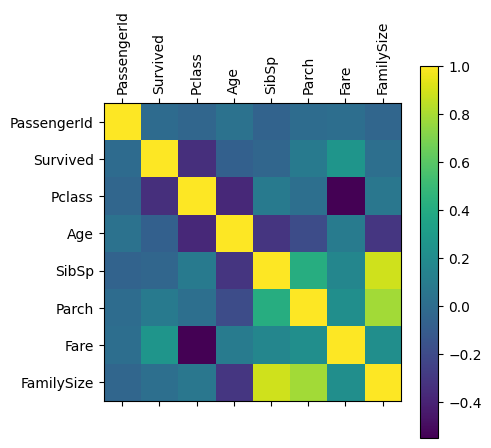

In [41]:
corr_scores = titanic.corr(numeric_only=True)
print(corr_scores)
plt.matshow(corr_scores)
num_labels = len(corr_scores.index)
plt.xticks(ticks=range(num_labels), labels=corr_scores.index, rotation=90)
plt.yticks(ticks=range(num_labels), labels=corr_scores.index, rotation=0)
plt.colorbar()
plt.savefig(r"C:\Users\Chenz\Desktop\data science\CorrDisplay.png") 
plt.show()


#Corr score is my figure that conveys something. So as you know, I made my own column of data
# so I figured why not compare it against EVERYTHING! This table also lets us see how each
# data column relates to each other, and how correlated they are. 
# Unsurprisingly, my FamilySize column is even more correlated with other things (such as
# fare) than just alone (SibSp & Parch). Par/Ch and Sib/Sp are also very related, my 
# assumption being as one brings more family members along in one category, they will
# in others as well

In [8]:
# getting rid of missing values
condata = titanic[['Survived', 'Pclass']].dropna()

#contingency table
contingency_table = pd.crosstab(condata['Survived'], condata['Pclass'])

# chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

contingency_table, chi2, p, dof, expected


#Contingency table & Chi-Square Test

(Pclass      1   2    3
 Survived              
 0          80  97  372
 1         136  87  119,
 np.float64(102.88898875696056),
 np.float64(4.549251711298793e-23),
 2,
 array([[133.09090909, 113.37373737, 302.53535354],
        [ 82.90909091,  70.62626263, 188.46464646]]))

In [25]:
# total passengers per port
total_Q = titanic.query("Embarked == 'Q'").shape[0]
total_S = titanic.query("Embarked == 'S'").shape[0]
total_C = titanic.query("Embarked == 'C'").shape[0]

# percentage breakdown for each class per port... What started as one line of code turned to 9... :(
percent_class_Q_1 = (titanic.query("Embarked == 'Q' and Pclass == 1").shape[0] / total_Q) * 100
percent_class_Q_2 = (titanic.query("Embarked == 'Q' and Pclass == 2").shape[0] / total_Q) * 100
percent_class_Q_3 = (titanic.query("Embarked == 'Q' and Pclass == 3").shape[0] / total_Q) * 100

percent_class_S_1 = (titanic.query("Embarked == 'S' and Pclass == 1").shape[0] / total_S) * 100
percent_class_S_2 = (titanic.query("Embarked == 'S' and Pclass == 2").shape[0] / total_S) * 100
percent_class_S_3 = (titanic.query("Embarked == 'S' and Pclass == 3").shape[0] / total_S) * 100

percent_class_C_1 = (titanic.query("Embarked == 'C' and Pclass == 1").shape[0] / total_C) * 100
percent_class_C_2 = (titanic.query("Embarked == 'C' and Pclass == 2").shape[0] / total_C) * 100
percent_class_C_3 = (titanic.query("Embarked == 'C' and Pclass == 3").shape[0] / total_C) * 100

# print + format  output
print("% Breakdown of Passenger Classes per Port:")
print("\nQueenstown (Port Q): \nClass 1: " + str(percent_class_Q_1) + "% \nClass 2: " + str(percent_class_Q_2) + "% \nClass 3: " + str(percent_class_Q_3) + "%")
print("\nSouthampton (Port S): \nClass 1: " + str(percent_class_S_1) + "% \nClass 2: " + str(percent_class_S_2) + "% \nClass 3: " + str(percent_class_S_3) + "%")
print("\nCherbourg (Port C): \nClass 1: " + str(percent_class_C_1) + "% \nClass 2: " + str(percent_class_C_2) + "% \nClass 3: " + str(percent_class_C_3) + "%")


% Breakdown of Passenger Classes per Port:

Queenstown (Port Q): 
Class 1: 2.5974025974025974% 
Class 2: 3.896103896103896% 
Class 3: 93.5064935064935%

Southampton (Port S): 
Class 1: 19.72049689440994% 
Class 2: 25.465838509316768% 
Class 3: 54.81366459627329%

Cherbourg (Port C): 
Class 1: 50.595238095238095% 
Class 2: 10.119047619047619% 
Class 3: 39.285714285714285%
